don't go here! often

========================Iteration 0 =======================
	 time: 1.70200705528

========================Iteration 1 =======================
	 time: 1.9159579277

========================Iteration 2 =======================
	 time: 1.91163015366

========================Iteration 3 =======================
	 time: 1.86476516724

========================Iteration 4 =======================
	 time: 1.9035551548


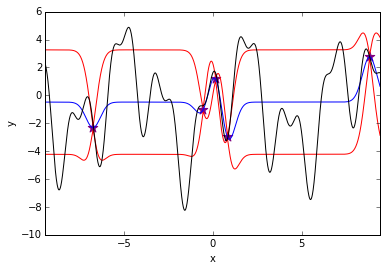

In [32]:
import gaussian_process, covariance_functions, acquisition_functions, bayesian_optimization, sys, datasets
import numpy as np
import matplotlib.pyplot as p
%matplotlib inline

#parameters gaussian process
dimensions = 1
noise = 0.147466383452
cov_func = covariance_functions.gaussian_kernel
cov_grad = covariance_functions.gaussian_kernel_gradient
width = 0.405484484786
amp =  3.74014862455 
params = [width, amp]

#initialize gaussian process
gp = gaussian_process.GP_Regressor(dimensions, noise, cov_func, cov_grad, params)

#parameters bayesian optimization
iterations = 5
goal_func = (lambda x: 3*datasets.toy_func(x) + np.random.normal(0,0.2, size=x.shape)) #lambda x: datasets.toy_func(x) + np.random.normal(0,0.5)#
acqui_func = acquisition_functions.get_function("UCB", 2)
#maybe have something like this
X_range = np.arange(-3*np.pi, 3*np.pi, 0.01)[:,np.newaxis]

#execute bayesian optimization
#gp = bayesian_optimization.bayesian_optimization(gp, iterations, goal_func, acqui_func, X_range)
bounds = [(None, None),(None, None),(None, None)]
save_every = 100
gp, gp_list, s_list, aux_list = bayesian_optimization.bayesian_optimization(gp, iterations, goal_func, 
                                                                  acqui_func, X_range, bounds, save_every=save_every, start_opt=100)


for i in range(len(gp_list)):

    gpi = gp_list[i]
    X_new, Y_new = s_list[i]
    mean,cov = gpi.predict(X_range)
    var = cov.diagonal()[:,np.newaxis]
    p.title("Iteration: " + str(i*save_every))
    p.xlabel('x')
    p.ylabel('y')
    p.scatter(gpi.Xtrain,gpi.Ytrain_original,color='purple',marker='*', s=100) # training data
    p.plot(X_range,mean,color='blue')                  # GP mean
    p.plot(X_range,mean+var**.5,color='red')           # GP mean + std
    p.plot(X_range,mean-var**.5,color='red')           # GP mean - std
    p.plot(X_range, 3*datasets.toy_func(X_range),color='black')           # GP mean - std
    p.scatter(X_new,Y_new,color='purple',marker='*', s=100)   # test data
    p.xlim(-3*np.pi,3*np.pi)
    p.show()

    
mean,cov = gp.predict(X_range)
var = cov.diagonal()[:,np.newaxis]
# Plot the data

#p.title("Iteration: " + str(i))
p.xlabel('x')
p.ylabel('y')
p.scatter(gp.Xtrain,gp.Ytrain_original,color='purple',marker='*', s=100) # training data
p.plot(X_range,mean,color='blue')                  # GP mean
p.plot(X_range,mean+var**.5,color='red')           # GP mean + std
p.plot(X_range,mean-var**.5,color='red')           # GP mean - std
p.plot(X_range, 3*datasets.toy_func(X_range),color='black')           # GP mean - std
#p.scatter(X_new,Y_new,color='purple',marker='*', s=100)   # test data
p.xlim(-3*np.pi,3*np.pi)
p.savefig("bo1dexample.png")
p.show()